In [11]:
import pandas as pd

data = pd.read_csv("demo_data/data_export.csv")

#data = data.drop(columns = ['id'])

data = data[['fid','VALUE','label']]
data

,fid,VALUE,label
0,18,0.103423,3
1,20,0.201345,3
2,47,0.136587,3
3,50,0.133879,3
4,57,0.213410,3
5,60,0.268893,3
6,104,0.175092,3
7,162,0.137478,1
8,163,0.169128,1
9,165,0.180463,1


In [101]:
options = [20,57,60,    197,204,246,292,     177,175,172, 163,165,]
### condition is in
cleaned_data = data[data['fid'].isin(options)]
### condition is not in
#cleaned_data = data.loc[~data['fid'].isin(options)]
# fid = 47,50,57,20,(60),162,104
cleaned_data.describe()
cleaned_data.groupby('label').mean()

#cleaned_data

,fid,VALUE
label,,
1,170.000000,0.171123
2,234.750000,0.197474
3,45.666667,0.227883


In [74]:
#print(data.corr())
print(cleaned_data.corr())

            fid     VALUE     label
fid    1.000000 -0.446665 -0.555715
VALUE -0.446665  1.000000  0.774785
label -0.555715  0.774785  1.000000


In [91]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(cleaned_data)
centroids = kmeans.cluster_centers_
print(centroids)


[[1.80166667e+02 1.81965503e-01 1.33333333e+00]
 [4.56666667e+01 2.27882513e-01 3.00000000e+00]
 [2.69000000e+02 1.91296720e-01 2.00000000e+00]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


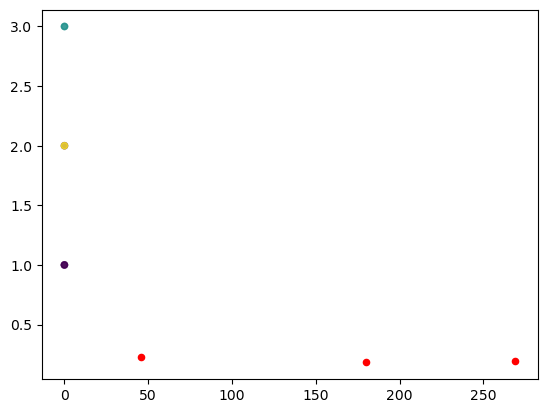

In [94]:
plt.scatter(cleaned_data['VALUE'], cleaned_data['label'], c=kmeans.labels_.astype(float), s=20, alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=20)
plt.show()

In [54]:
kmeans

KMeans(n_clusters=3)

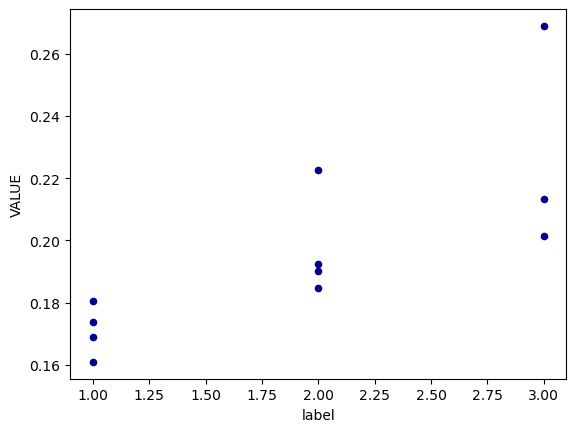

In [56]:
ax1 = cleaned_data.plot.scatter(x='label',
                      y='VALUE',
                      c='DarkBlue')

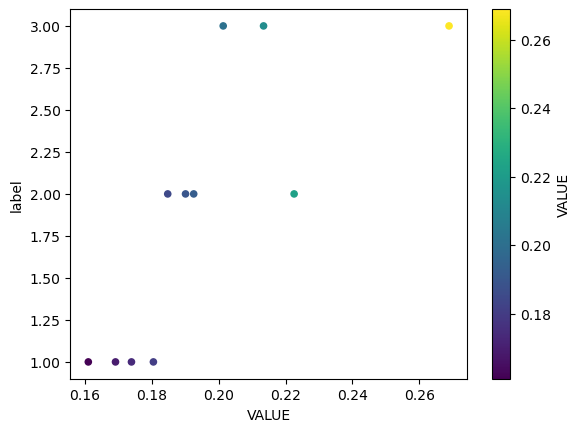

In [68]:
ax2 = cleaned_data.plot.scatter(x='VALUE',
                      y='label',
                      c='VALUE',
                      colormap='viridis')